In [1]:
import numpy as np
import pandas as pd
import os
from collections import defaultdict
import matplotlib.pyplot as plt

/var/folders/hy/7dgp17_x5gj4yst7z54lk7440000gn/T/ipykernel_1923/762058919.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/Users/me/git/semantic-kitti-api/venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


TypeError: no numeric data to plot

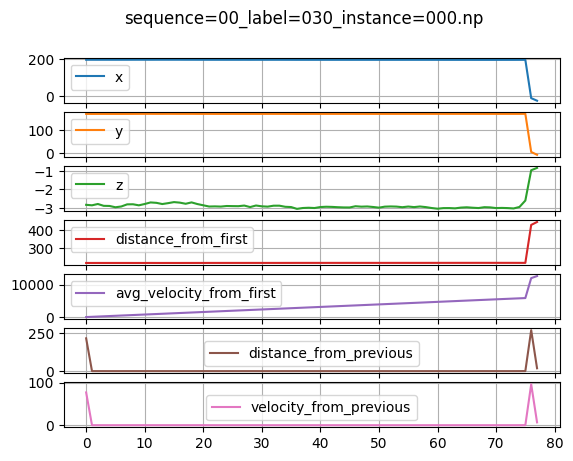

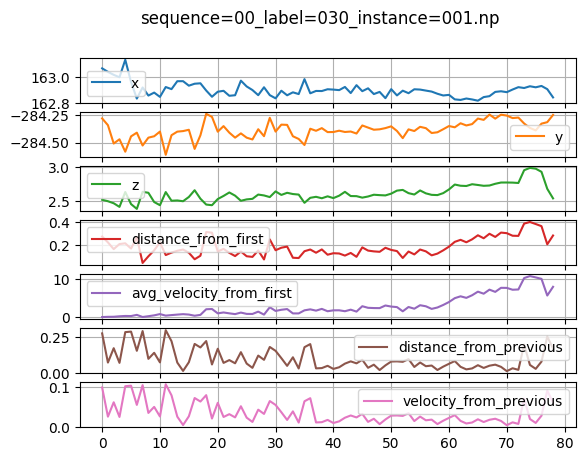

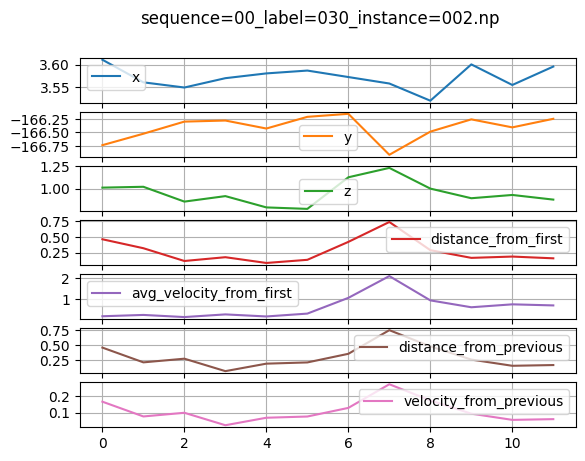

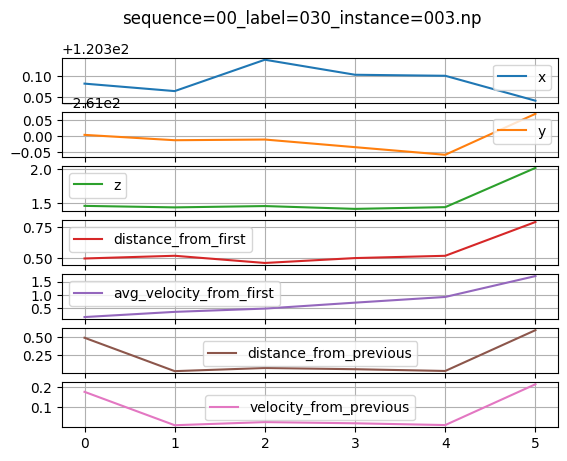

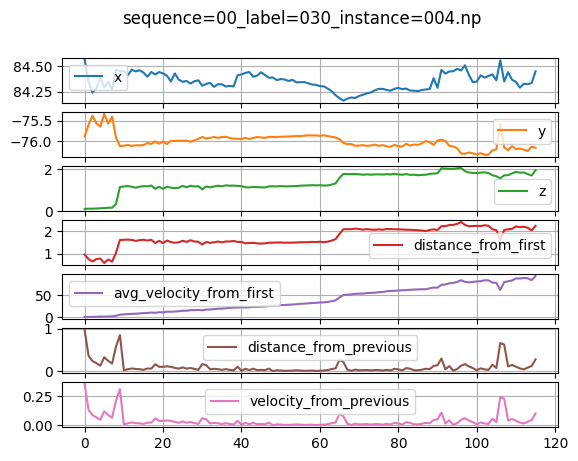

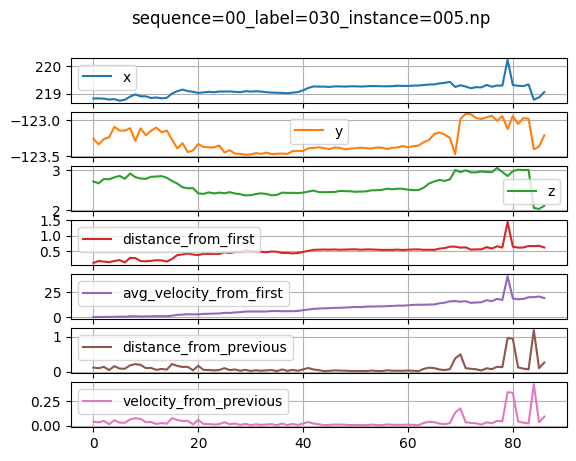

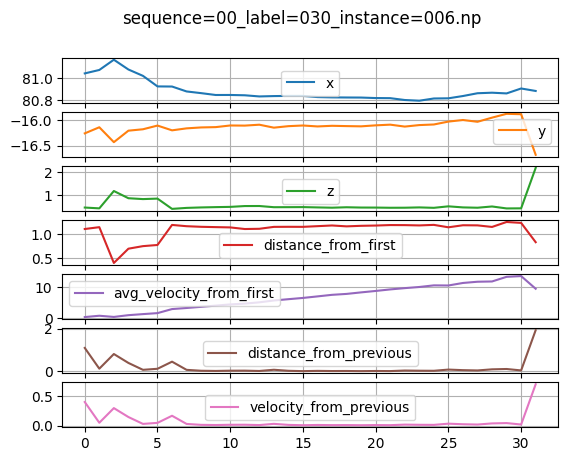

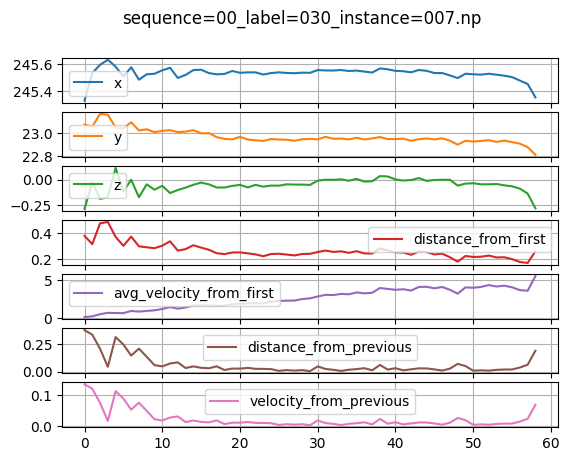

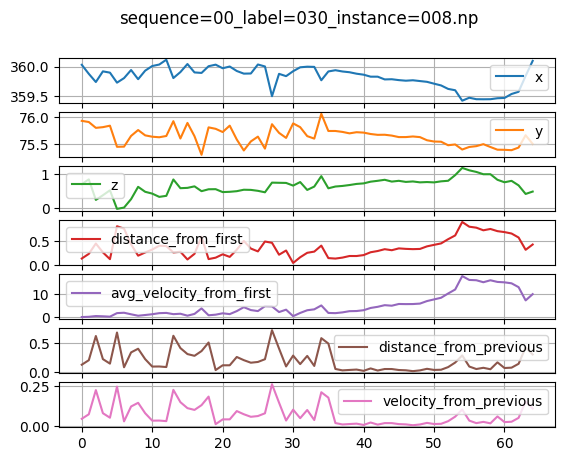

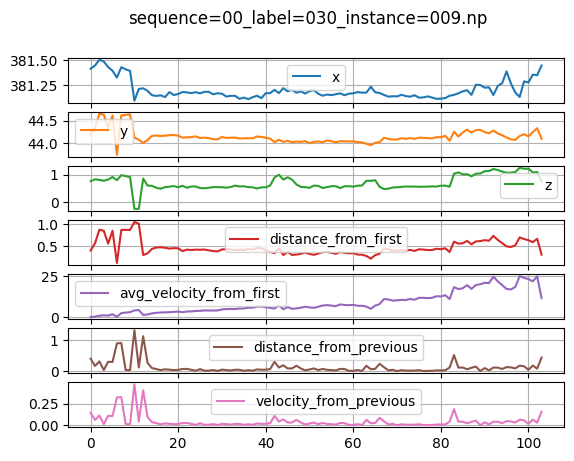

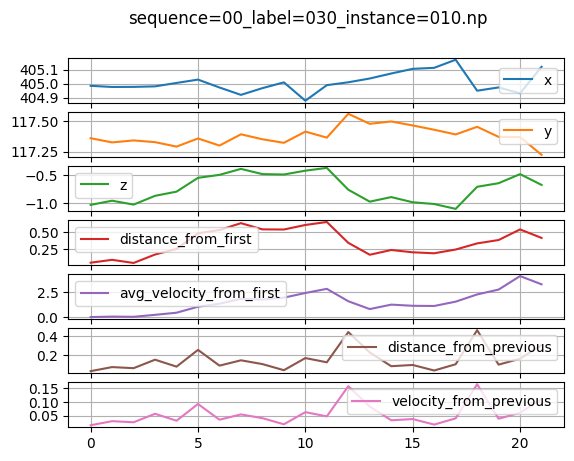

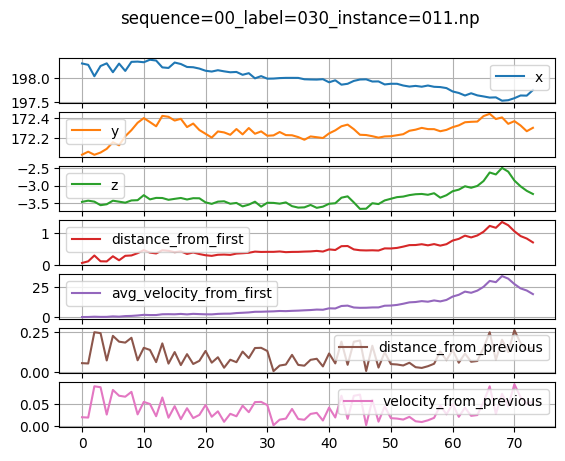

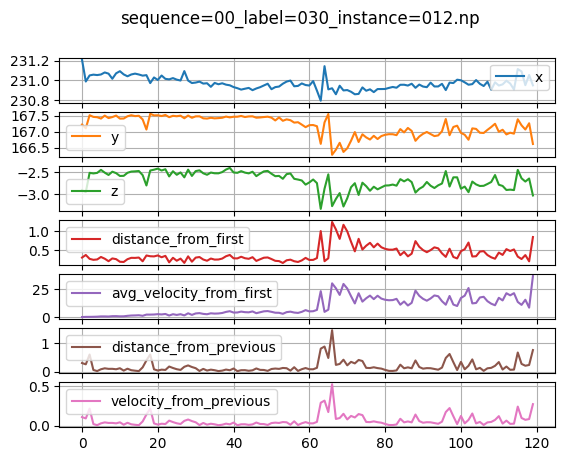

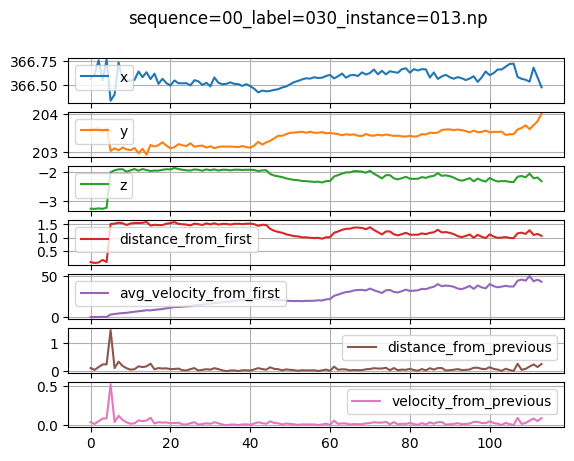

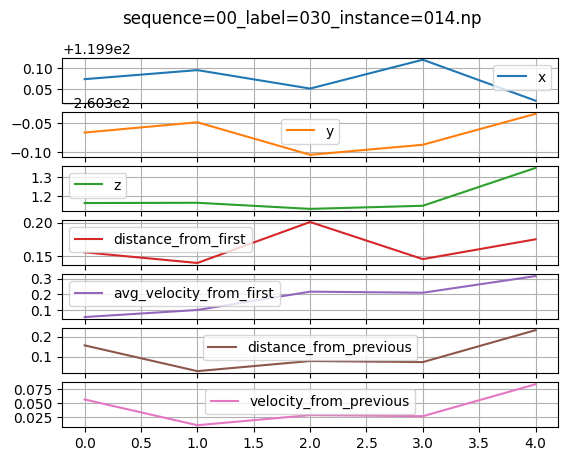

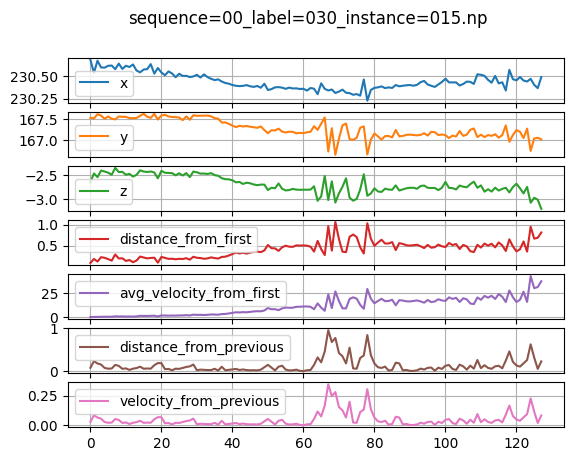

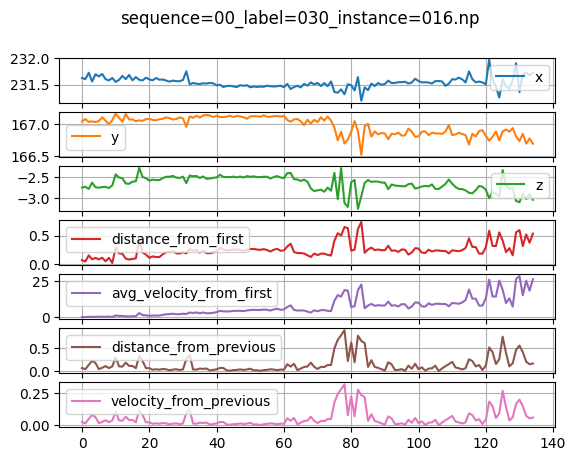

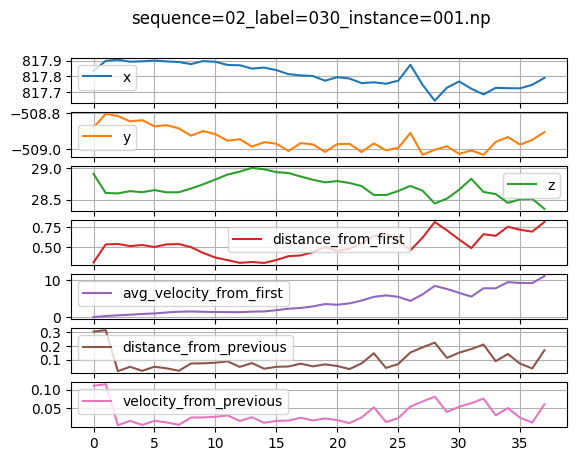

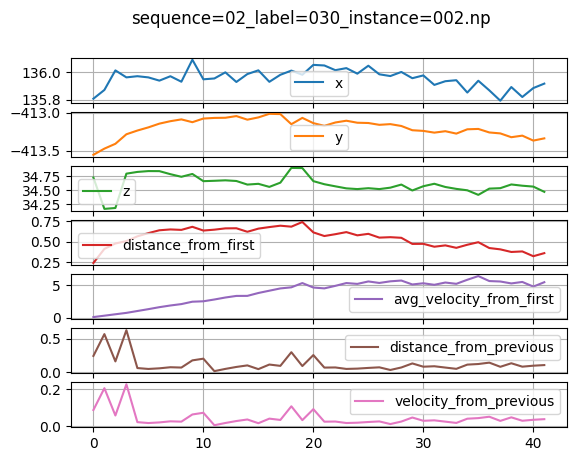

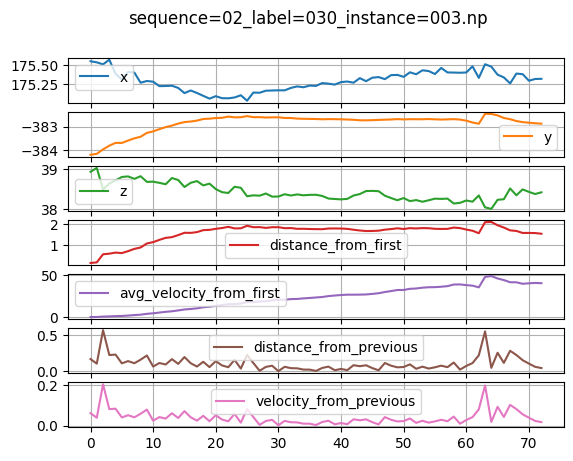

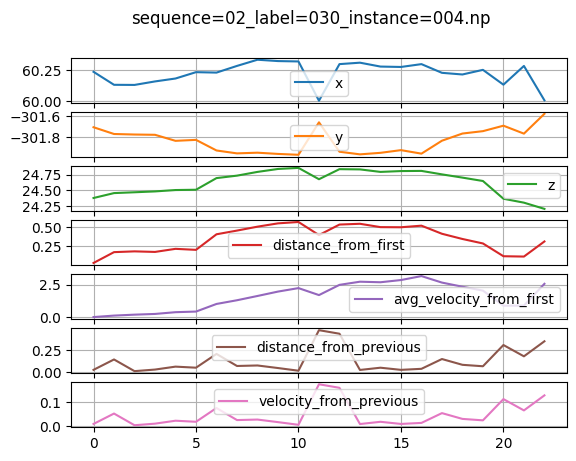

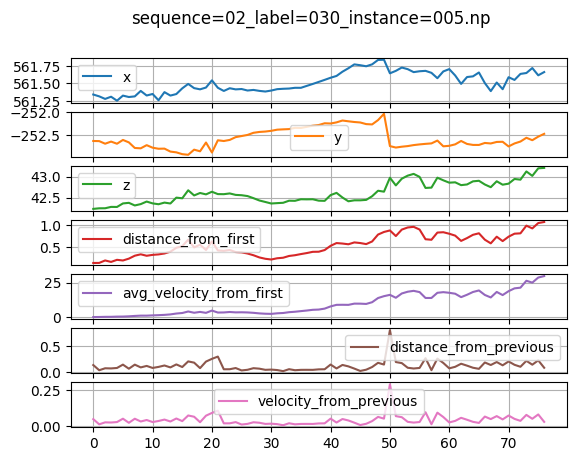

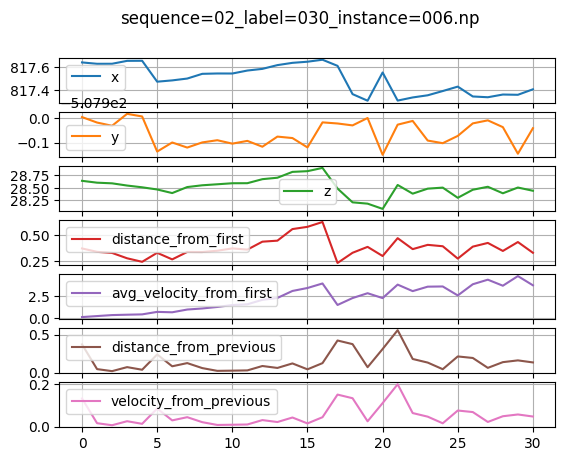

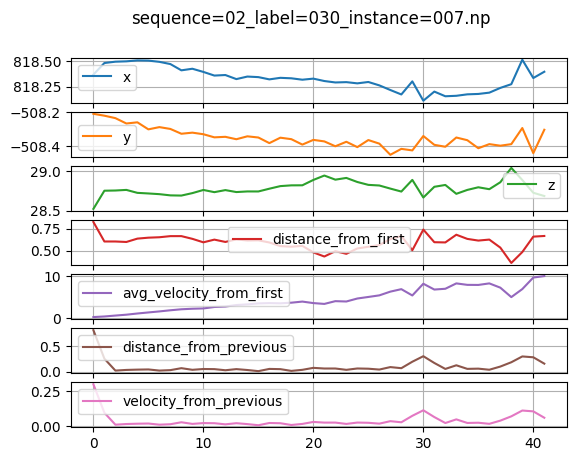

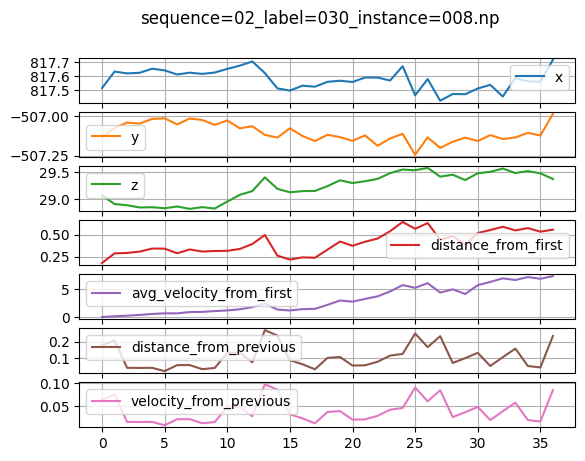

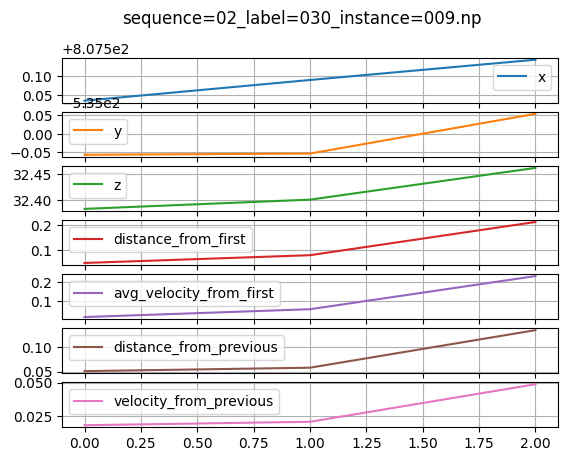

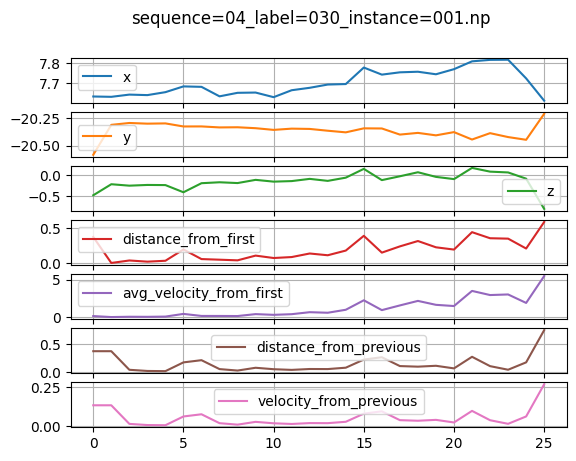

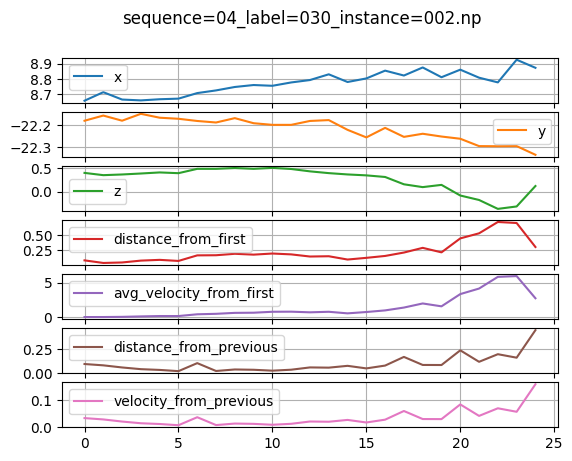

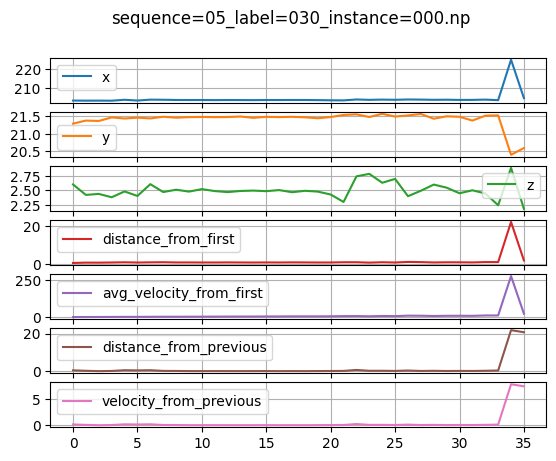

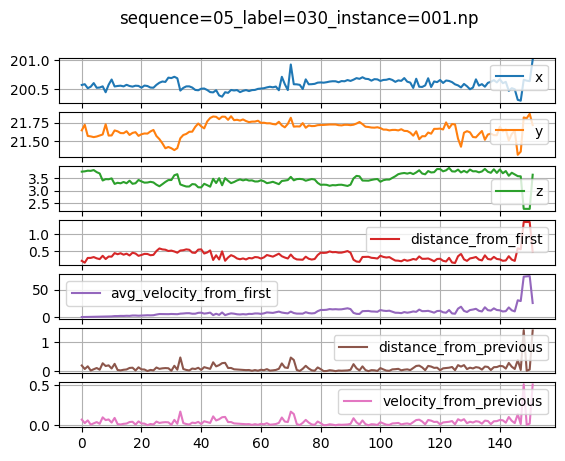

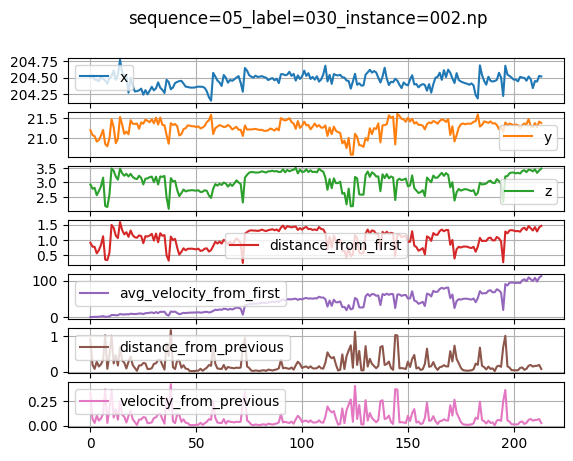

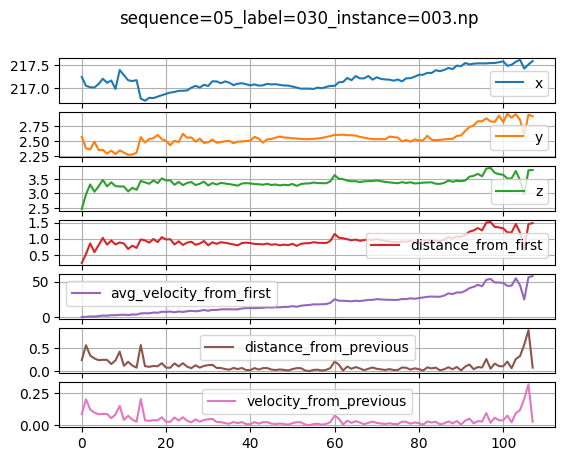

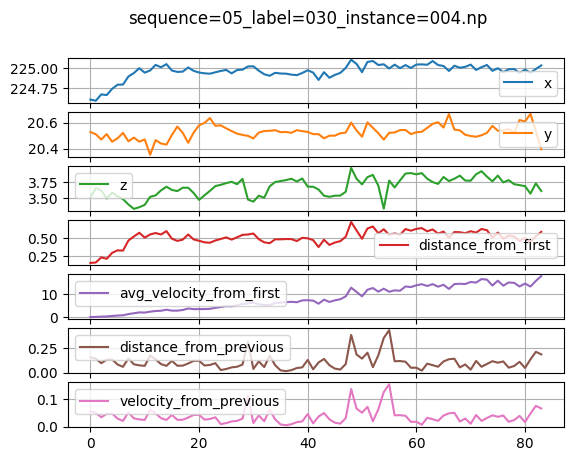

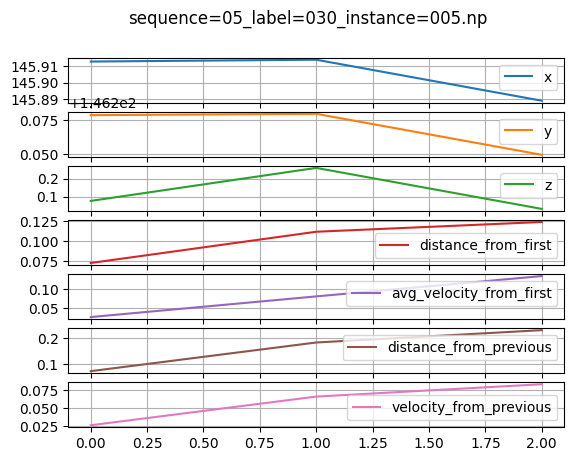

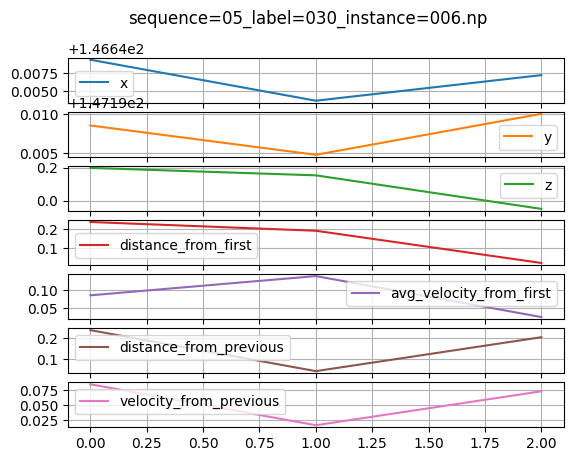

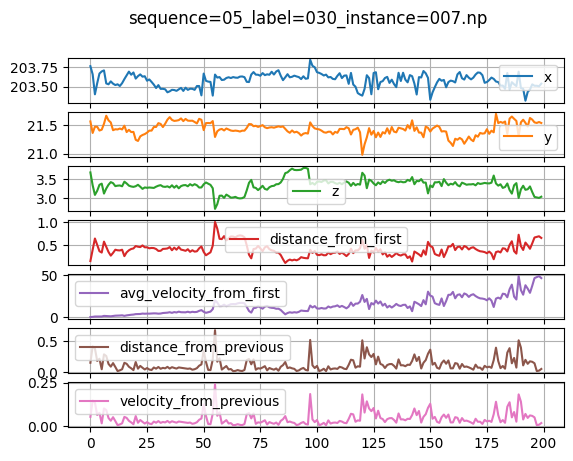

In [2]:

def calculate_metrics_df(points):
    point_first = points[0]
    point_previous = points[0]

    metrics = defaultdict(list)

    for i, point_current in enumerate(points[1:]):

        metrics['x'].append(point_current[0])
        metrics['y'].append(point_current[1])
        metrics['z'].append(point_current[2])

        distance_from_first = np.linalg.norm(point_current-point_first)
        metrics['distance_from_first'].append(distance_from_first)
        avg_velocity_from_first = (distance_from_first / 10 * (i+1)) * 3.6 # 1 frame in 10 seconds
        metrics['avg_velocity_from_first'].append(avg_velocity_from_first)

        distance_from_previous = np.linalg.norm(point_current-point_previous)
        metrics['distance_from_previous'].append(distance_from_previous)
        velocity_from_previous = (distance_from_previous / 10) * 3.6 # 1 frame in 10 seconds
        metrics['velocity_from_previous'].append(velocity_from_previous)

        point_previous = point_current

    return pd.DataFrame.from_dict(metrics)

for filename in sorted(os.listdir('object_traces')):
    sequence, label, instance = filename[:-3].split('_') # returns ['sequence=09', 'label=030', 'instance=015']
    points = np.fromfile(f'object_traces/{filename}', dtype=np.float32).reshape((-1, 3))

    df = calculate_metrics_df(points)
    ax = df.plot(subplots=True, grid=True, title=filename)
    plt.savefig(f'plots/{filename}.png')
